<a href="https://colab.research.google.com/github/11adi/Is_it_a_Disaster/blob/master/Disaster_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disaster Classification

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the tweets.csv dataset
df = pd.read_csv("tweets.csv")

# Separate features and labels
X = df["text"].astype(str)  # Text feature
y = df["target"].values  # Target label

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = max(len(sequence) for sequence in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding="post")
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post")

# Create a simple LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_sequence_length),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5)

# Train the model
model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_pred = model.predict(X_test_padded)
y_pred_classes = np.round(y_pred).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


Epoch 1/50
285/285 [==============================] - 11s 30ms/step - loss: 0.3795 - accuracy: 0.8558 - val_loss: 0.2786 - val_accuracy: 0.8945
Epoch 2/50
285/285 [==============================] - 8s 28ms/step - loss: 0.2224 - accuracy: 0.9208 - val_loss: 0.2777 - val_accuracy: 0.9015
Epoch 3/50
285/285 [==============================] - 7s 24ms/step - loss: 0.1671 - accuracy: 0.9454 - val_loss: 0.2733 - val_accuracy: 0.8958
Epoch 4/50
285/285 [==============================] - 8s 28ms/step - loss: 0.1263 - accuracy: 0.9616 - val_loss: 0.3219 - val_accuracy: 0.8923
Epoch 5/50
285/285 [==============================] - 7s 26ms/step - loss: 0.1048 - accuracy: 0.9715 - val_loss: 0.3631 - val_accuracy: 0.8742
Epoch 6/50
285/285 [==============================] - 8s 28ms/step - loss: 0.0918 - accuracy: 0.9764 - val_loss: 0.3978 - val_accuracy: 0.8975
Epoch 7/50
285/285 [==============================] - 8s 29ms/step - loss: 0.0787 - accuracy: 0.9804 - val_loss: 0.3928 - val_accuracy: 0.885

# Visualization

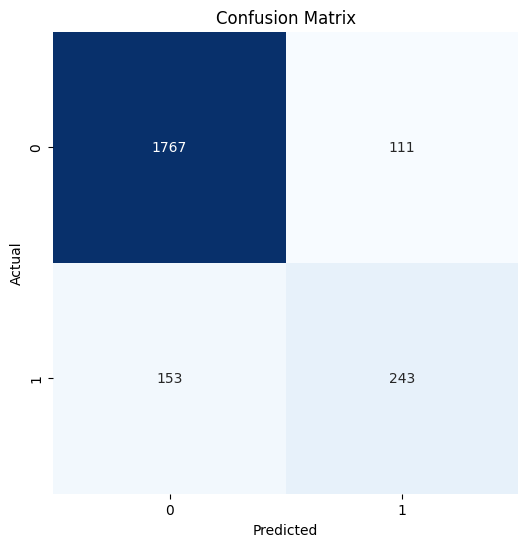

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_pred_classes is the predicted class labels (0 or 1)
confusion = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


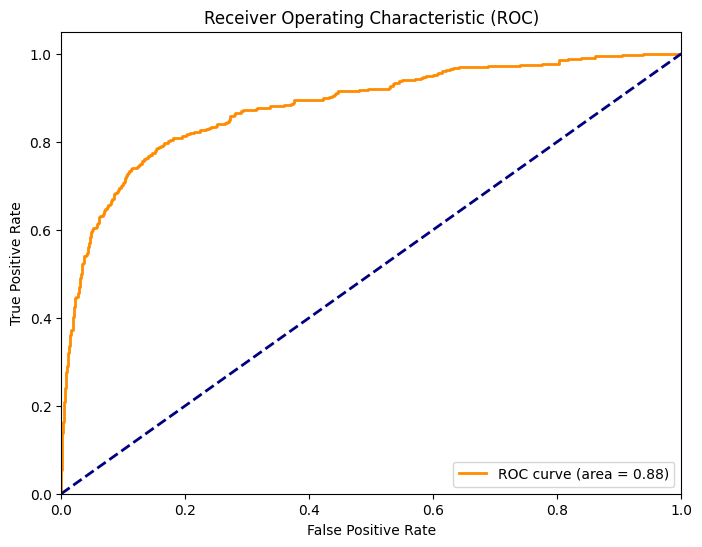

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_pred is the predicted probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()


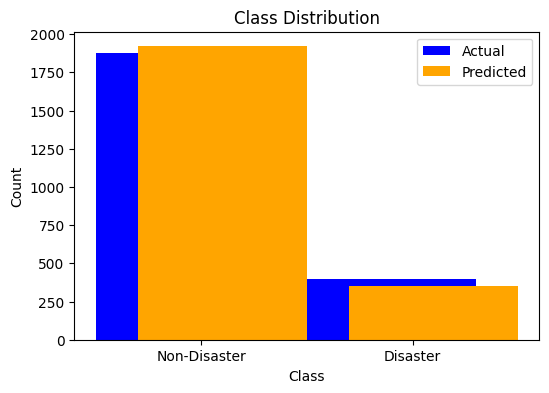

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in y_test and y_pred_classes
class_counts_actual = pd.Series(y_test).value_counts()
class_counts_predicted = pd.Series(y_pred_classes).value_counts()

plt.figure(figsize=(6, 4))
plt.bar(class_counts_actual.index, class_counts_actual.values, color='blue', label='Actual')
plt.bar(class_counts_predicted.index + 0.2, class_counts_predicted.values, color='orange', label='Predicted')
plt.xticks(class_counts_actual.index + 0.1, labels=['Non-Disaster', 'Disaster'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.legend()
plt.show()


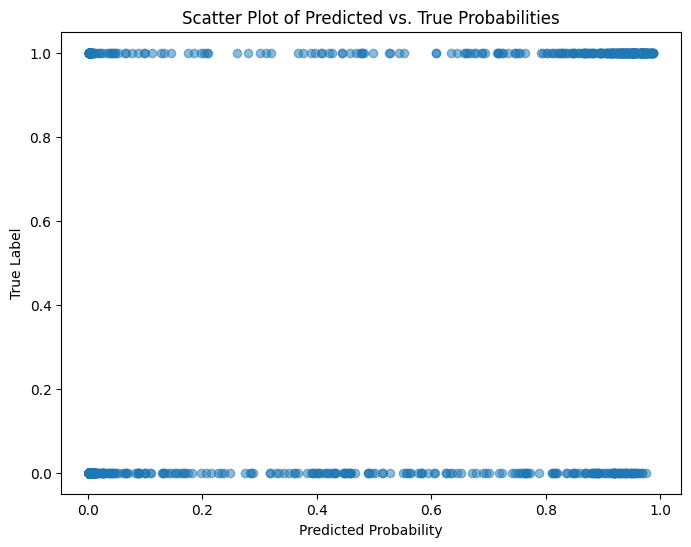

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred[:, 0], y_test, alpha=0.5)
plt.xlabel('Predicted Probability')
plt.ylabel('True Label')
plt.title('Scatter Plot of Predicted vs. True Probabilities')
plt.show()


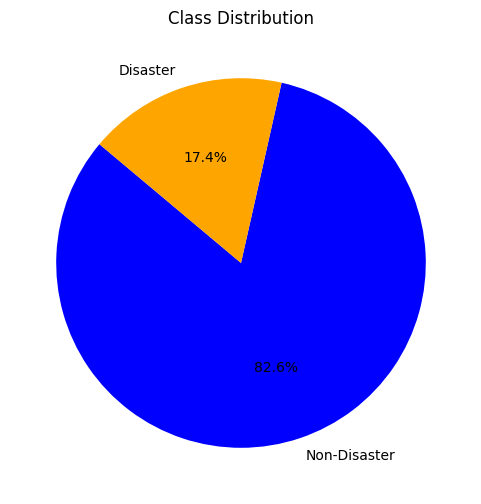

In [ ]:
class_labels = ['Non-Disaster', 'Disaster']
class_counts = [class_counts_actual[0], class_counts_actual[1]]

plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange'])
plt.title('Class Distribution')
plt.show()


# Real-time Classification

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

# Load the tweets.csv dataset
df = pd.read_csv("tweets.csv")

# Combine "location" and "text" columns
df["location_text"] = df["location"].fillna('') + ' ' + df["text"]

# Separate features and labels
X = df["location_text"].astype(str)  # Combined location and text feature
y = df["target"].values  # Target label

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the combined location and text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = max(len(sequence) for sequence in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding="post")
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post")

# Create a model that accepts both location and text inputs
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_sequence_length),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5)

# Train the model
model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

# Function to classify new text
def classify_new_text(model, tokenizer, max_sequence_length, location, text):
    combined_text = location + ' ' + text
    text_sequence = tokenizer.texts_to_sequences([combined_text])
    padded_sequence = pad_sequences(text_sequence, maxlen=max_sequence_length, padding="post")
    predicted_prob = model.predict(padded_sequence)[0][0]
    predicted_class = 1 if predicted_prob > 0.5 else 0
    return predicted_class, predicted_prob

# Input new location and text from users
new_location = input("Enter the location: ")
new_text = input("Enter the text: ")

# Classify new text
predicted_class, predicted_prob = classify_new_text(model, tokenizer, max_sequence_length, new_location, new_text)

# Output the results
print("Predicted Class:", predicted_class)
print("Predicted Probability:", predicted_prob)


Epoch 1/50
285/285 [==============================] - 15s 43ms/step - loss: 0.4251 - accuracy: 0.8342 - val_loss: 0.2890 - val_accuracy: 0.8940
Epoch 2/50
285/285 [==============================] - 11s 37ms/step - loss: 0.2468 - accuracy: 0.9111 - val_loss: 0.2992 - val_accuracy: 0.8918
Epoch 3/50
285/285 [==============================] - 11s 38ms/step - loss: 0.1791 - accuracy: 0.9387 - val_loss: 0.3082 - val_accuracy: 0.8997
Epoch 4/50
285/285 [==============================] - 11s 38ms/step - loss: 0.1440 - accuracy: 0.9559 - val_loss: 0.3556 - val_accuracy: 0.8984
Epoch 5/50
285/285 [==============================] - 14s 49ms/step - loss: 0.1064 - accuracy: 0.9704 - val_loss: 0.2966 - val_accuracy: 0.8975
Epoch 6/50
285/285 [==============================] - 18s 64ms/step - loss: 0.0947 - accuracy: 0.9760 - val_loss: 0.3402 - val_accuracy: 0.8967
Enter the location: INDIA
Enter the text: the weather is quite bad and might get even worse
1/1 [==============================] - 0s 41

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the tweets.csv dataset
df = pd.read_csv("tweets.csv")

# Combine "location" and "text" columns
df["location_text"] = df["location"].fillna('') + ' ' + df["text"]

# Separate features and labels
X = df["location_text"].astype(str)  # Combined location and text feature
y = df["target"].values  # Target label

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the combined location and text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = max(len(sequence) for sequence in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding="post")
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding="post")

# Create a model that accepts both location and text inputs
model = Sequential([
    Embedding(input_dim=5000, output_dim=32, input_length=max_sequence_length),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5)

# Train the model
model.fit(X_train_padded, y_train, epochs=50, validation_data=(X_test_padded, y_test), callbacks=[early_stopping])

# Function to classify new text
def classify_new_text(model, tokenizer, max_sequence_length, location, text):
    combined_text = location + ' ' + text
    text_sequence = tokenizer.texts_to_sequences([combined_text])
    padded_sequence = pad_sequences(text_sequence, maxlen=max_sequence_length, padding="post")
    predicted_prob = model.predict(padded_sequence)[0][0]
    predicted_class = 1 if predicted_prob > 0.5 else 0
    return predicted_class, predicted_prob

# Input new location and text from users
new_location = input("Enter the location: ")
new_text = input("Enter the text: ")

# Classify new text
predicted_class, predicted_prob = classify_new_text(model, tokenizer, max_sequence_length, new_location, new_text)

# Output the results
print("Predicted Class:", predicted_class)
print("Predicted Probability:", predicted_prob)


Epoch 1/50
285/285 [==============================] - 14s 41ms/step - loss: 0.4092 - accuracy: 0.8407 - val_loss: 0.2755 - val_accuracy: 0.8980
Epoch 2/50
285/285 [==============================] - 11s 38ms/step - loss: 0.2480 - accuracy: 0.9169 - val_loss: 0.2969 - val_accuracy: 0.9002
Epoch 3/50
285/285 [==============================] - 11s 40ms/step - loss: 0.1863 - accuracy: 0.9388 - val_loss: 0.2763 - val_accuracy: 0.9011
Epoch 4/50
285/285 [==============================] - 12s 41ms/step - loss: 0.1440 - accuracy: 0.9536 - val_loss: 0.2937 - val_accuracy: 0.8958
Epoch 5/50
285/285 [==============================] - 11s 38ms/step - loss: 0.1107 - accuracy: 0.9706 - val_loss: 0.3927 - val_accuracy: 0.8879
Epoch 6/50
285/285 [==============================] - 10s 36ms/step - loss: 0.0913 - accuracy: 0.9769 - val_loss: 0.3532 - val_accuracy: 0.8865
Enter the location: India
Enter the text: the weather is quite bad and might get even worse
1/1 [==============================] - 0s 42